# Seasonal and Weather Impact on Accident Type Distribution

This notebook intends to use Visual Analytics to explore the seasonal distribution of the accident types in New York City, and to be able to explain some of the accident types based on Weather Conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

## First iteration

For the first iteration of the diamond workflow by Keim et al., we first visualise the seasonal distribution of the various accidents in New York City. For this, the data is transformed and for each year and month, the number of accidents is extracted, and all the months for a given year are then plotted in a small multiples chart. 

In [2]:
datasets = []
for i in range(2013, 2024):

    file = f"./datasets/crashes_{i}.csv"
    result = pd.read_csv(file)
    result.dropna(subset=['BOROUGH'], inplace=True)
    datasets.append(result)

In [3]:
plt.rcParams['figure.figsize'] = (40,20)

def getPlots(datasets, desc):
    
    for i in range(0, len(datasets)):
        result = datasets[i]
        result["CRASH DATE"] = pd.to_datetime(result["CRASH DATE"])
        result["ACCIDENT_MONTH"] = result["CRASH DATE"].dt.month

        result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH DATE']

        plt.subplot(3,4,i+1)
        result_grped.plot.bar()
        plt.title(f"Accident numbers per month ({desc})")
        plt.ylabel("Number of accidents")
        
    plt.show()

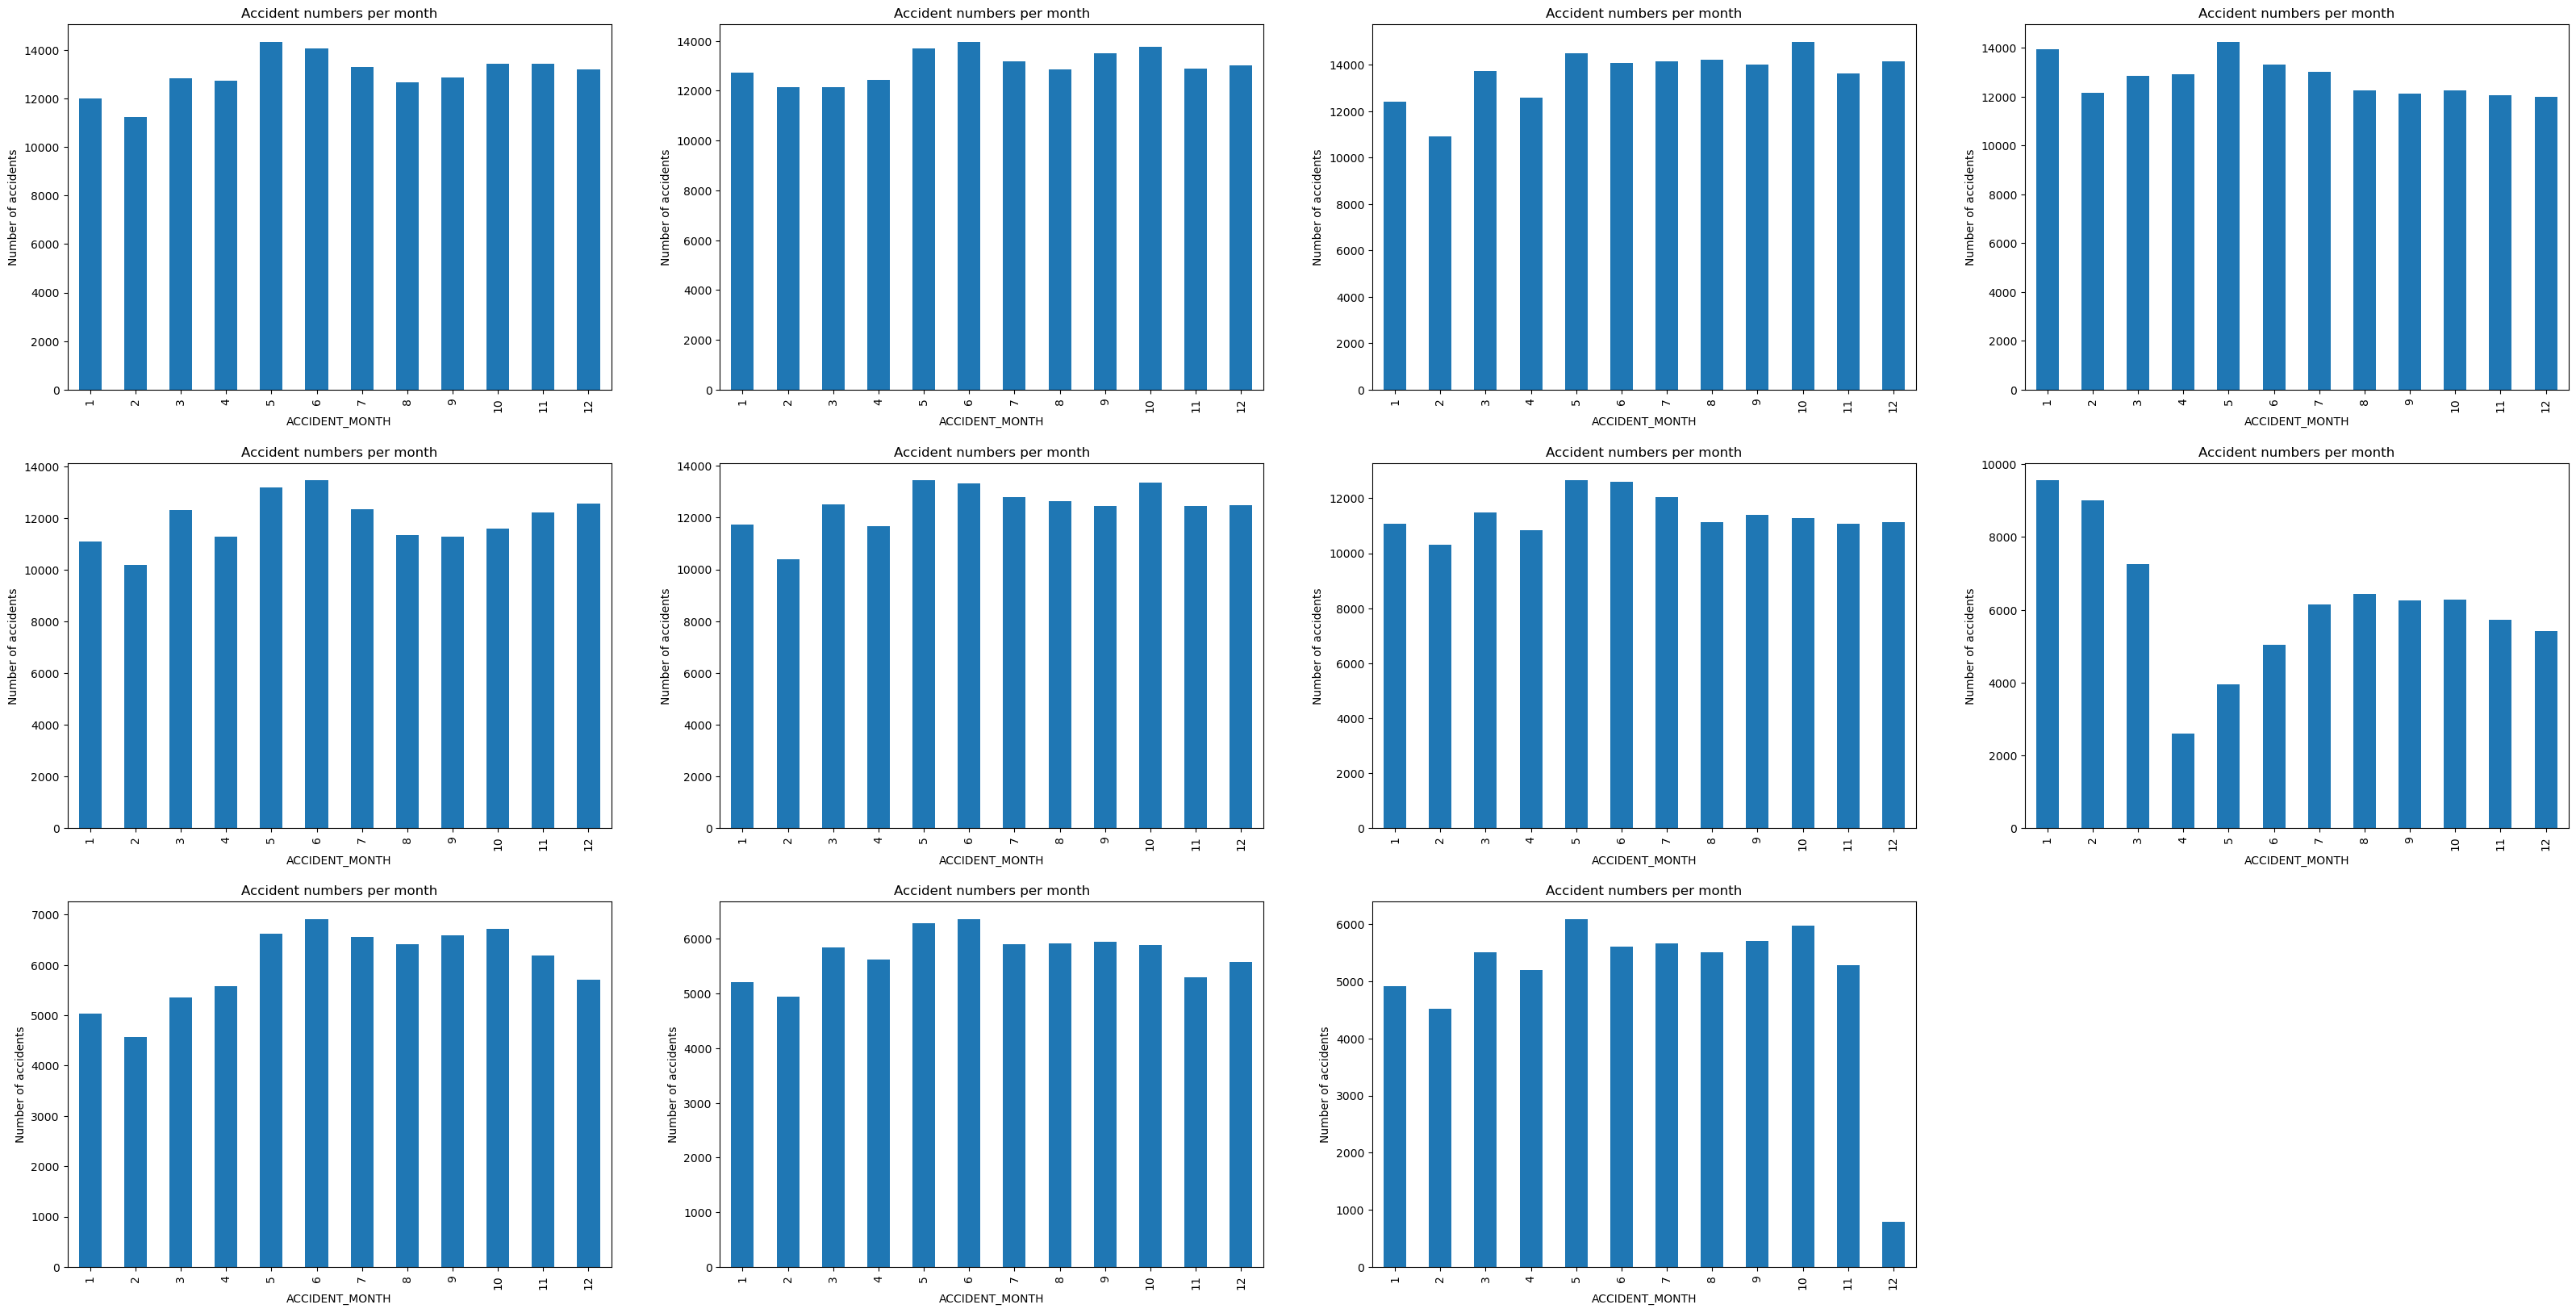

In [4]:
getPlots(datasets, "Total")

### Inferences 

The previous visualisation shows us the following details - 

1. As expected, there is a sudden drop in the number of accidents in March 2020, owing to the fact that the Covid 19 lockdown was brought into effect. Hence for this year, a reliable seasonal trend is not observed.

2. For the other years infact, we do observe a seasonal trend of the accidents, where for almost every year, we observe that there is a dip in the number of accidents in February, and the maximum number of accidents in the year are in the months of May and June.

3. This leads us to conclude that within a year, there may be an effect of the season distibution in New York City on the accident numbers.

As a supplement to this inference, we also try to observe the presence of a trend in the data for the different accident types as well. As previously seen, the accident types follow a similar trend of a dip in the accident numbers in 2020. 

Apart from the accidents related to medical/fatigue reasons, the accident types do also follow a seasonal trend.

The code for the same is below.

In [5]:
groupingDictionary_common = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}
    
def custom_acc_type(row, column):
    for j in groupingDictionary_common.keys():
        if (column == 1):
            if row['CONTRIBUTING FACTOR VEHICLE 1'] in groupingDictionary_common[j]:
                return j

In [6]:
for i in range(len(datasets)):
    datasets[i]['MAJOR ACCIDENT TYPE 1'] = datasets[i].apply(custom_acc_type, column=1 ,axis=1)

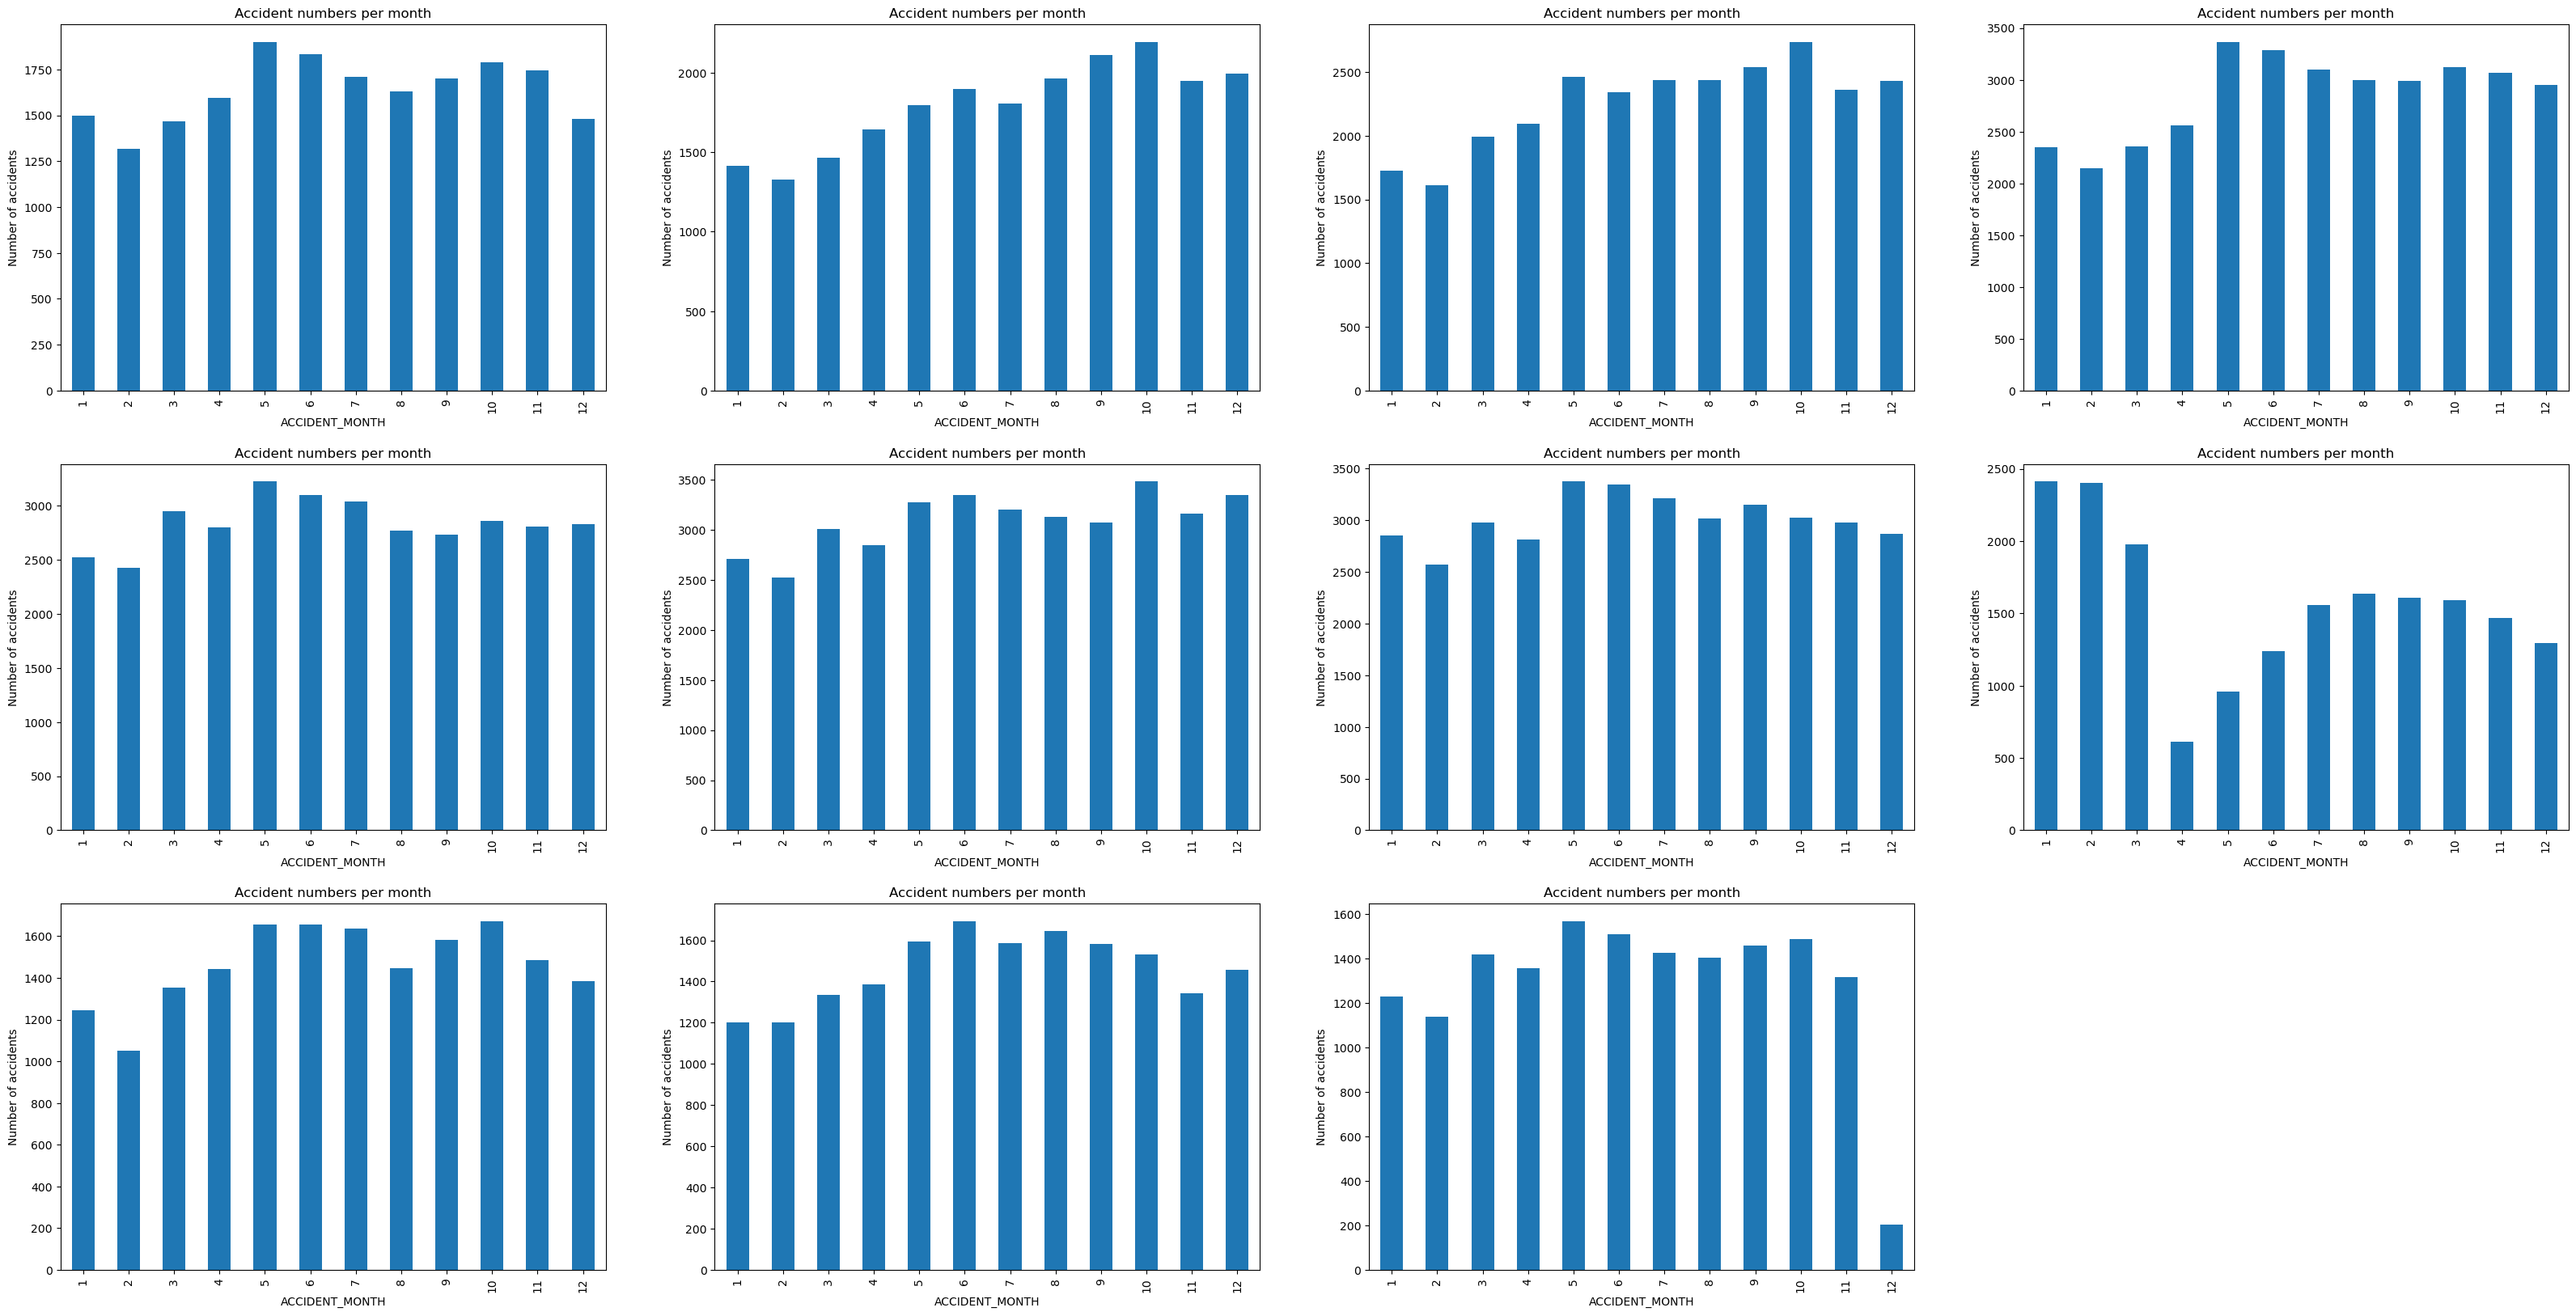

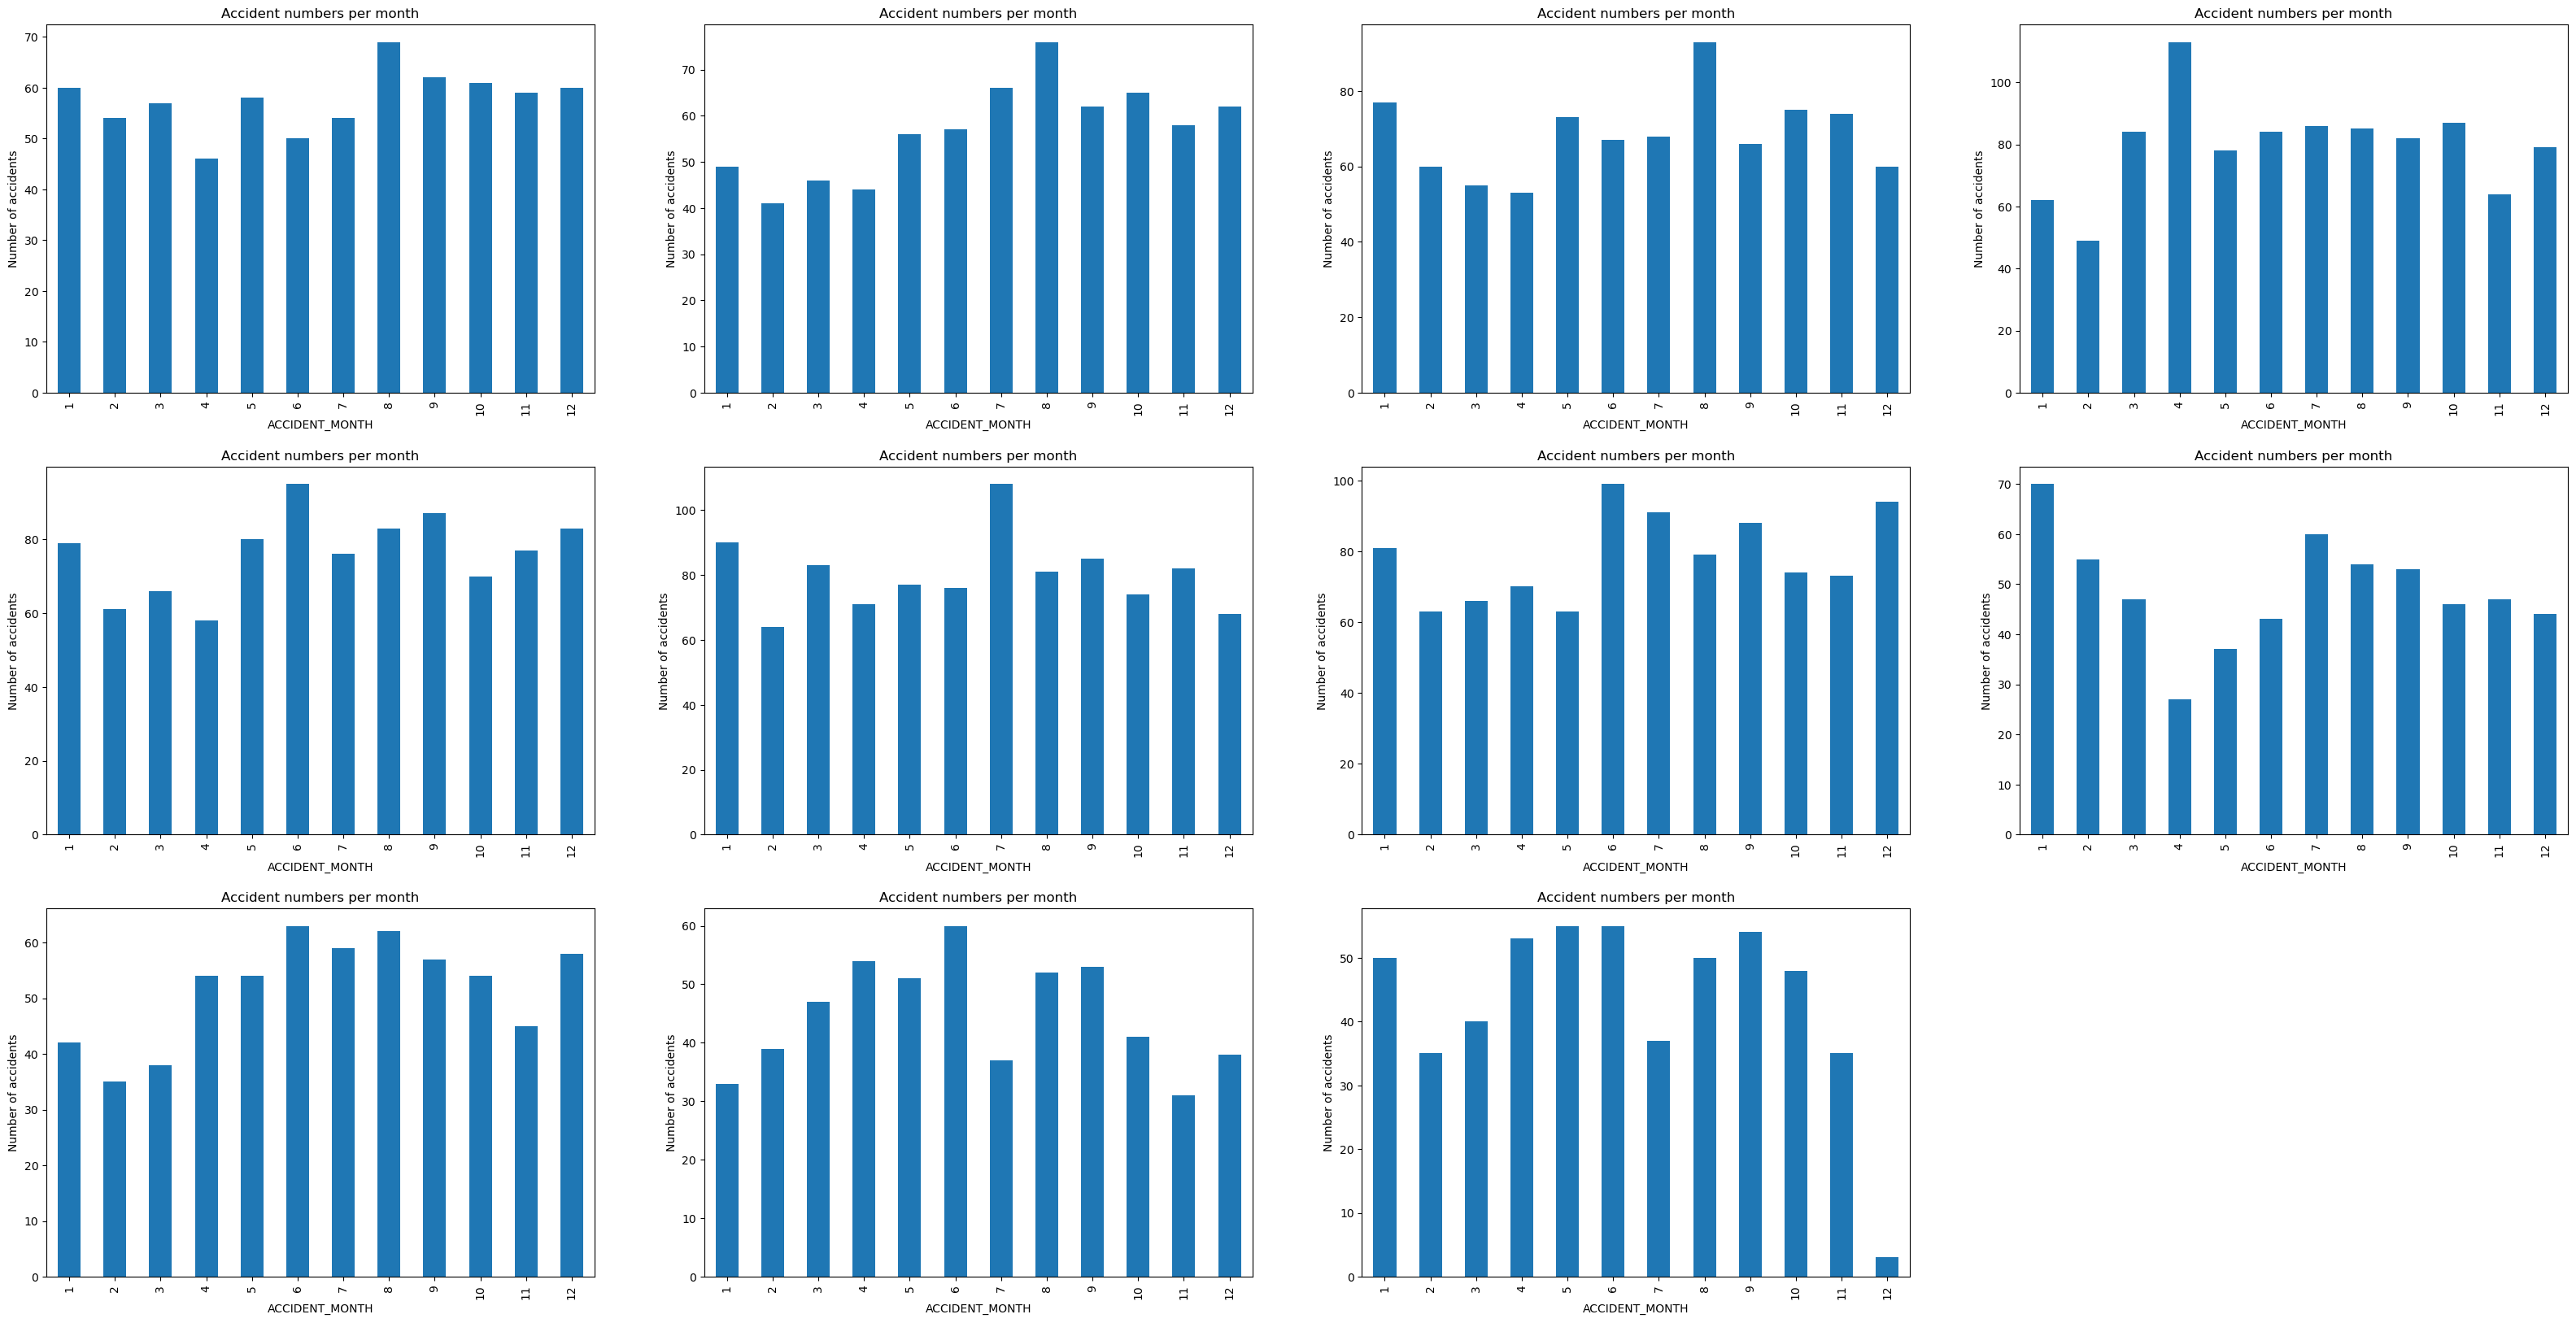

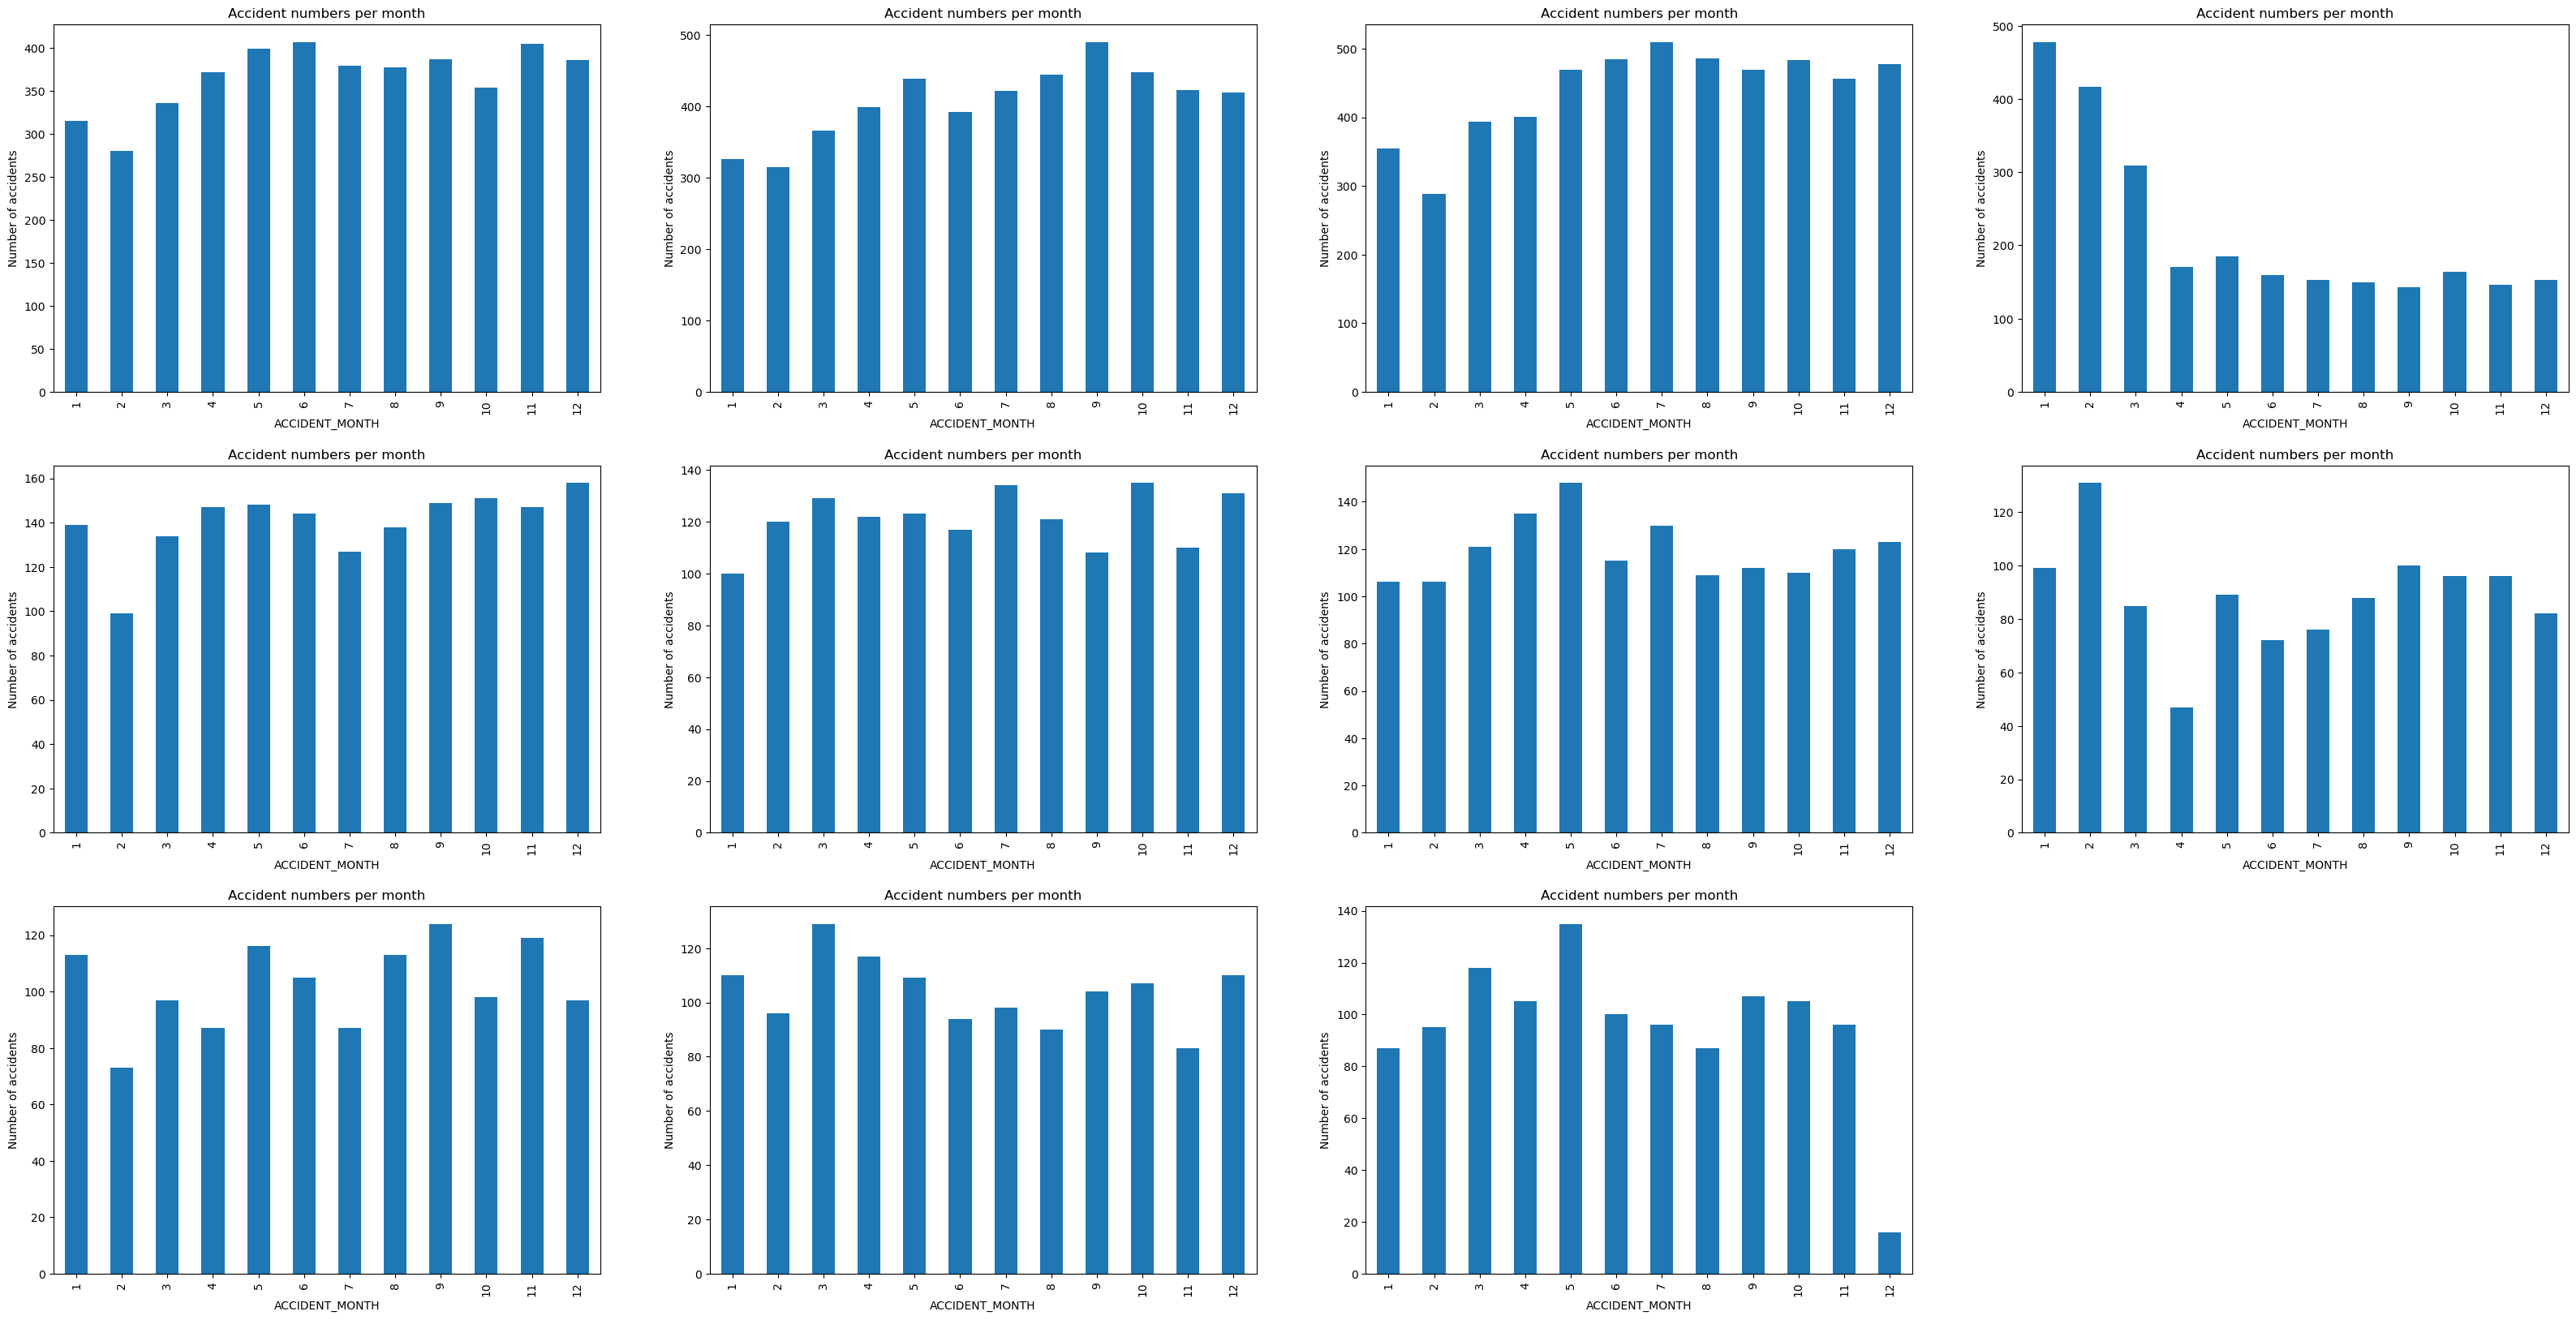

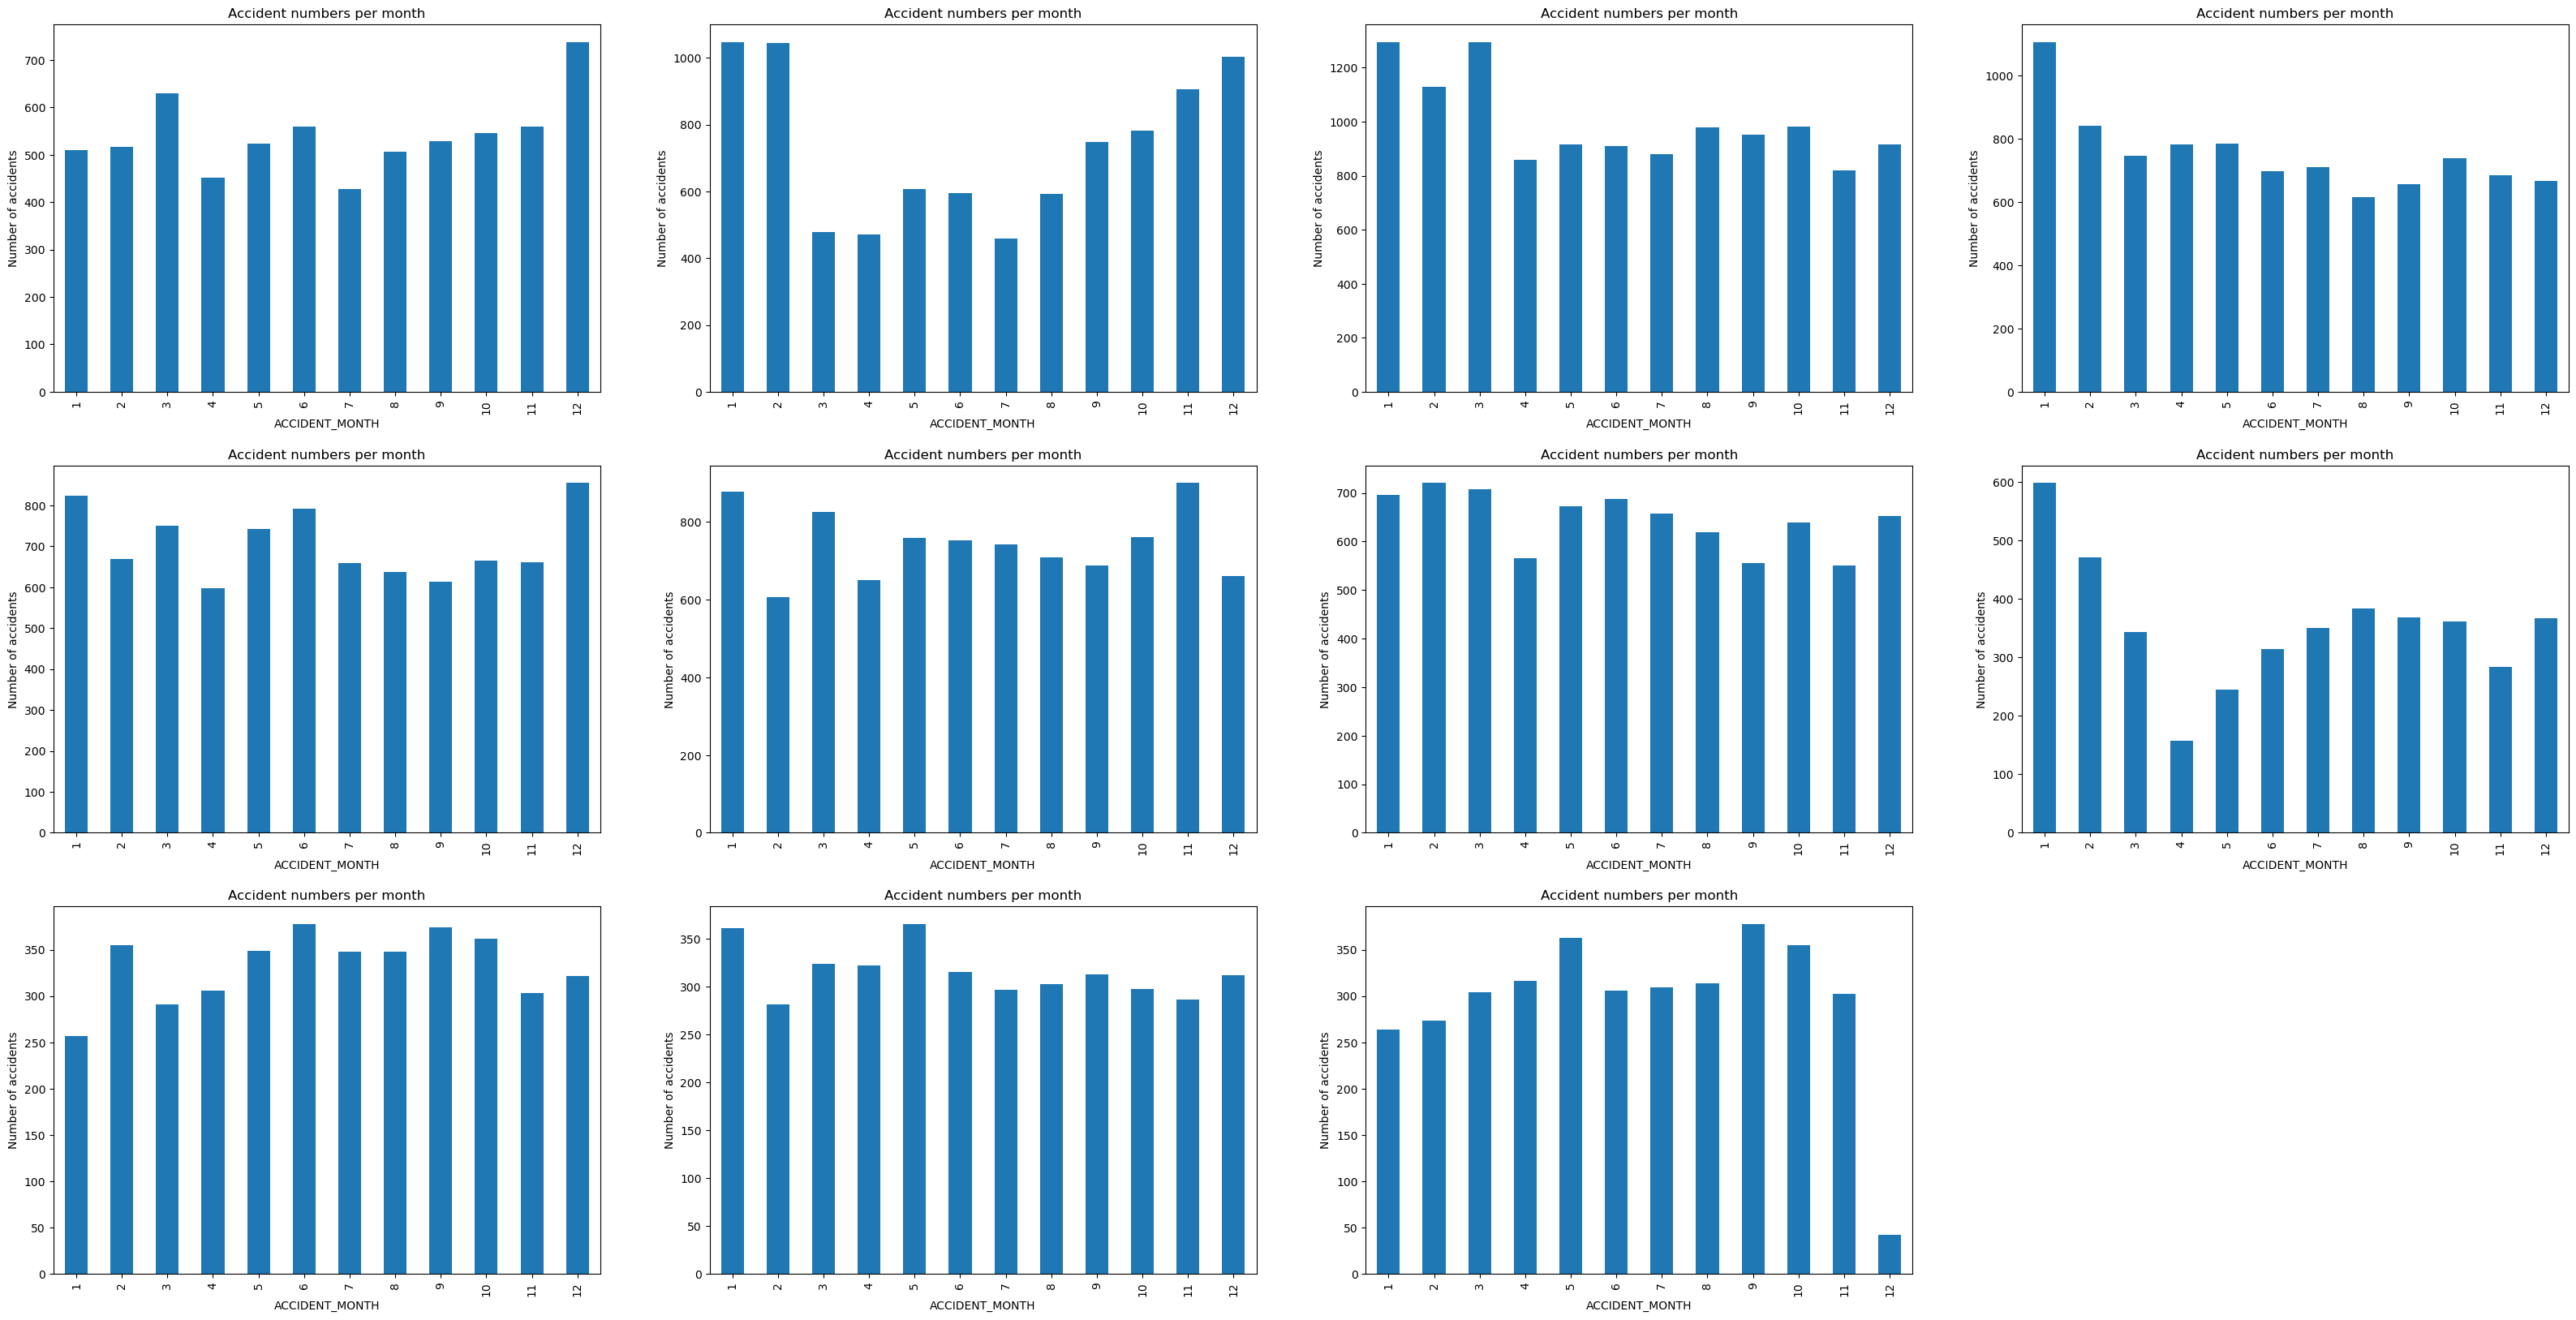

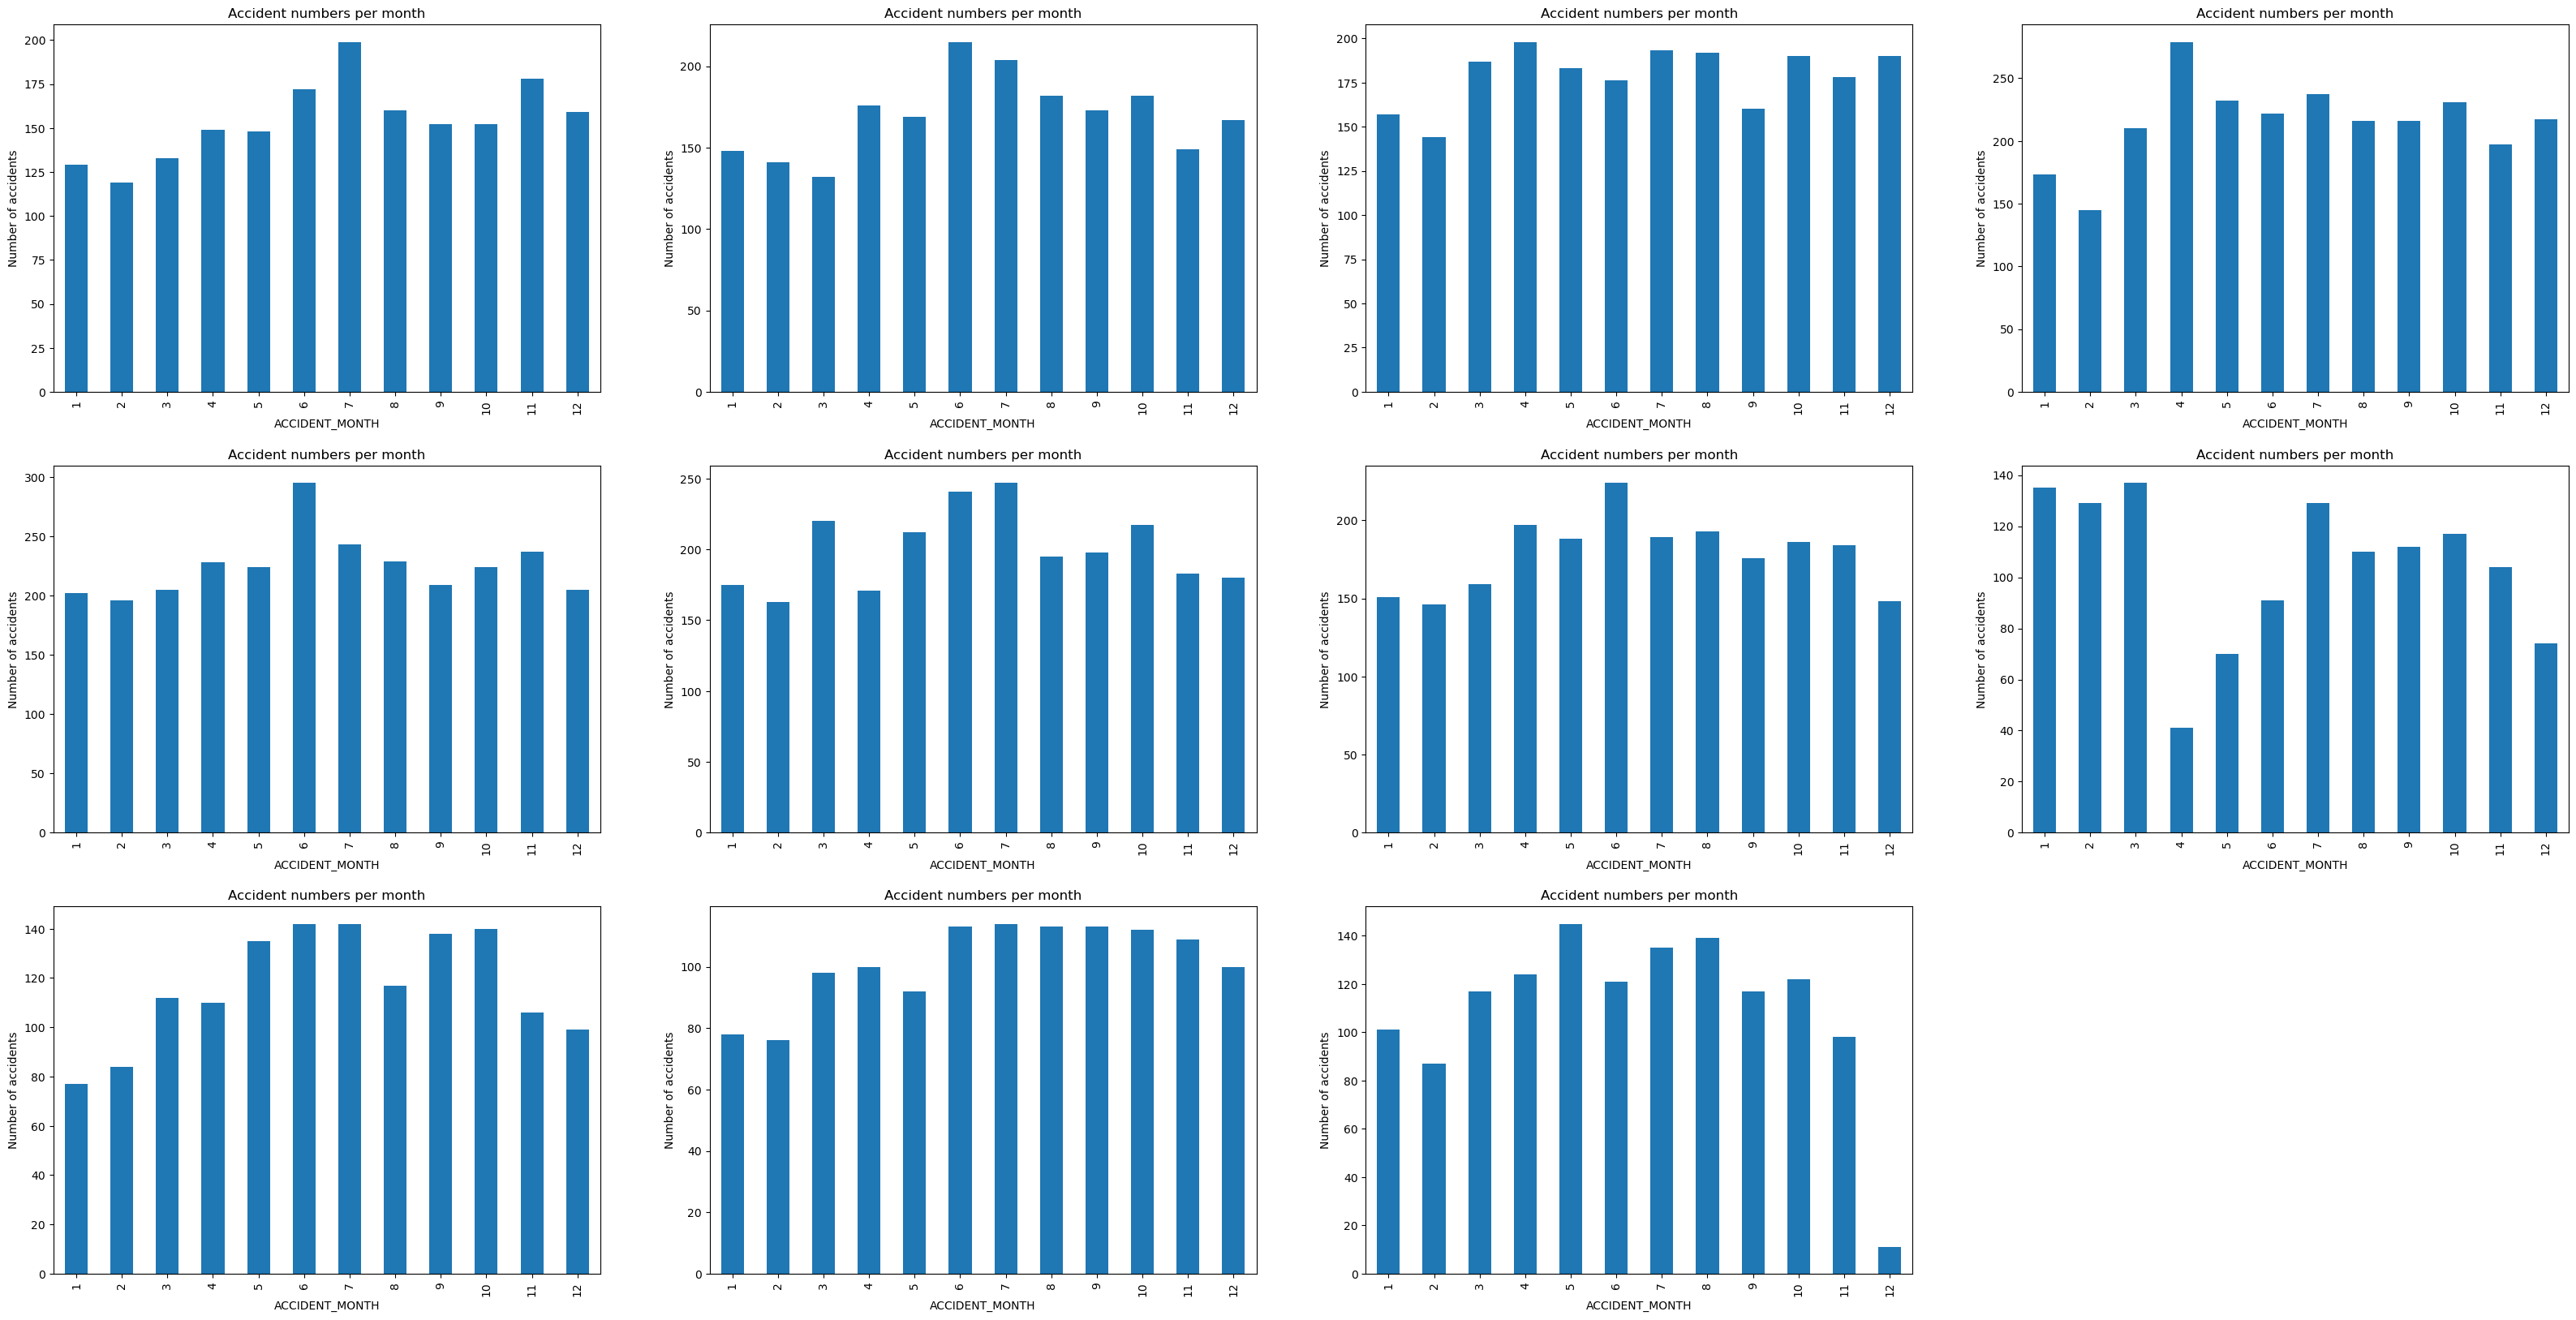

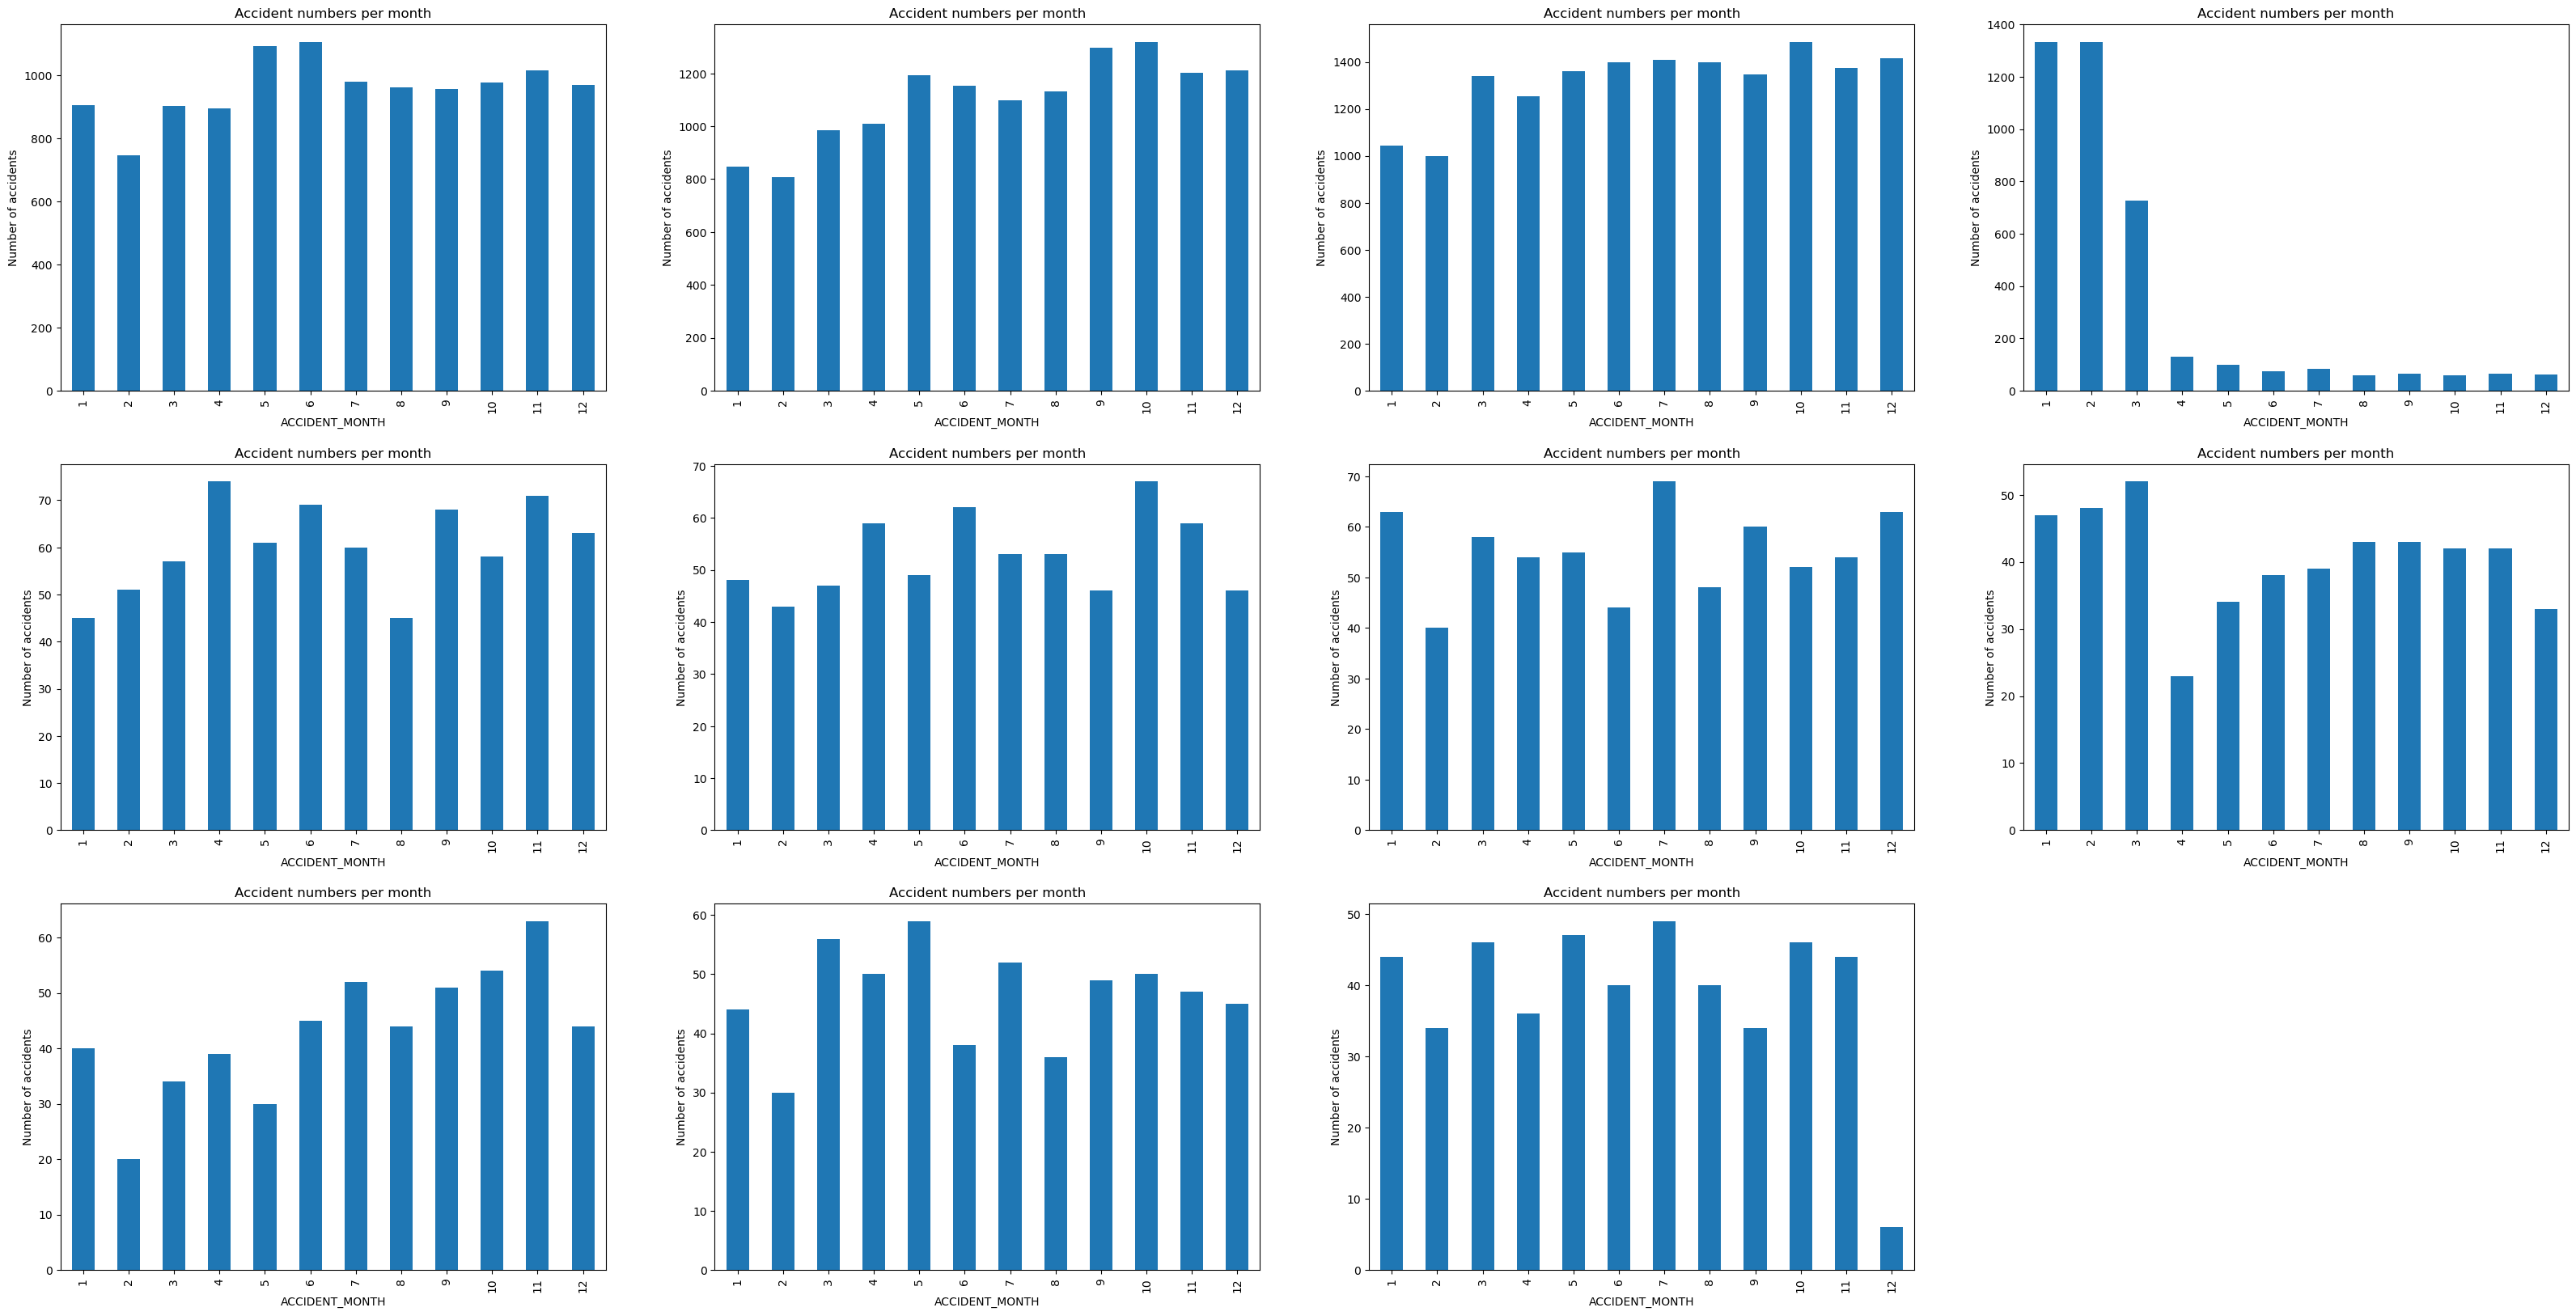

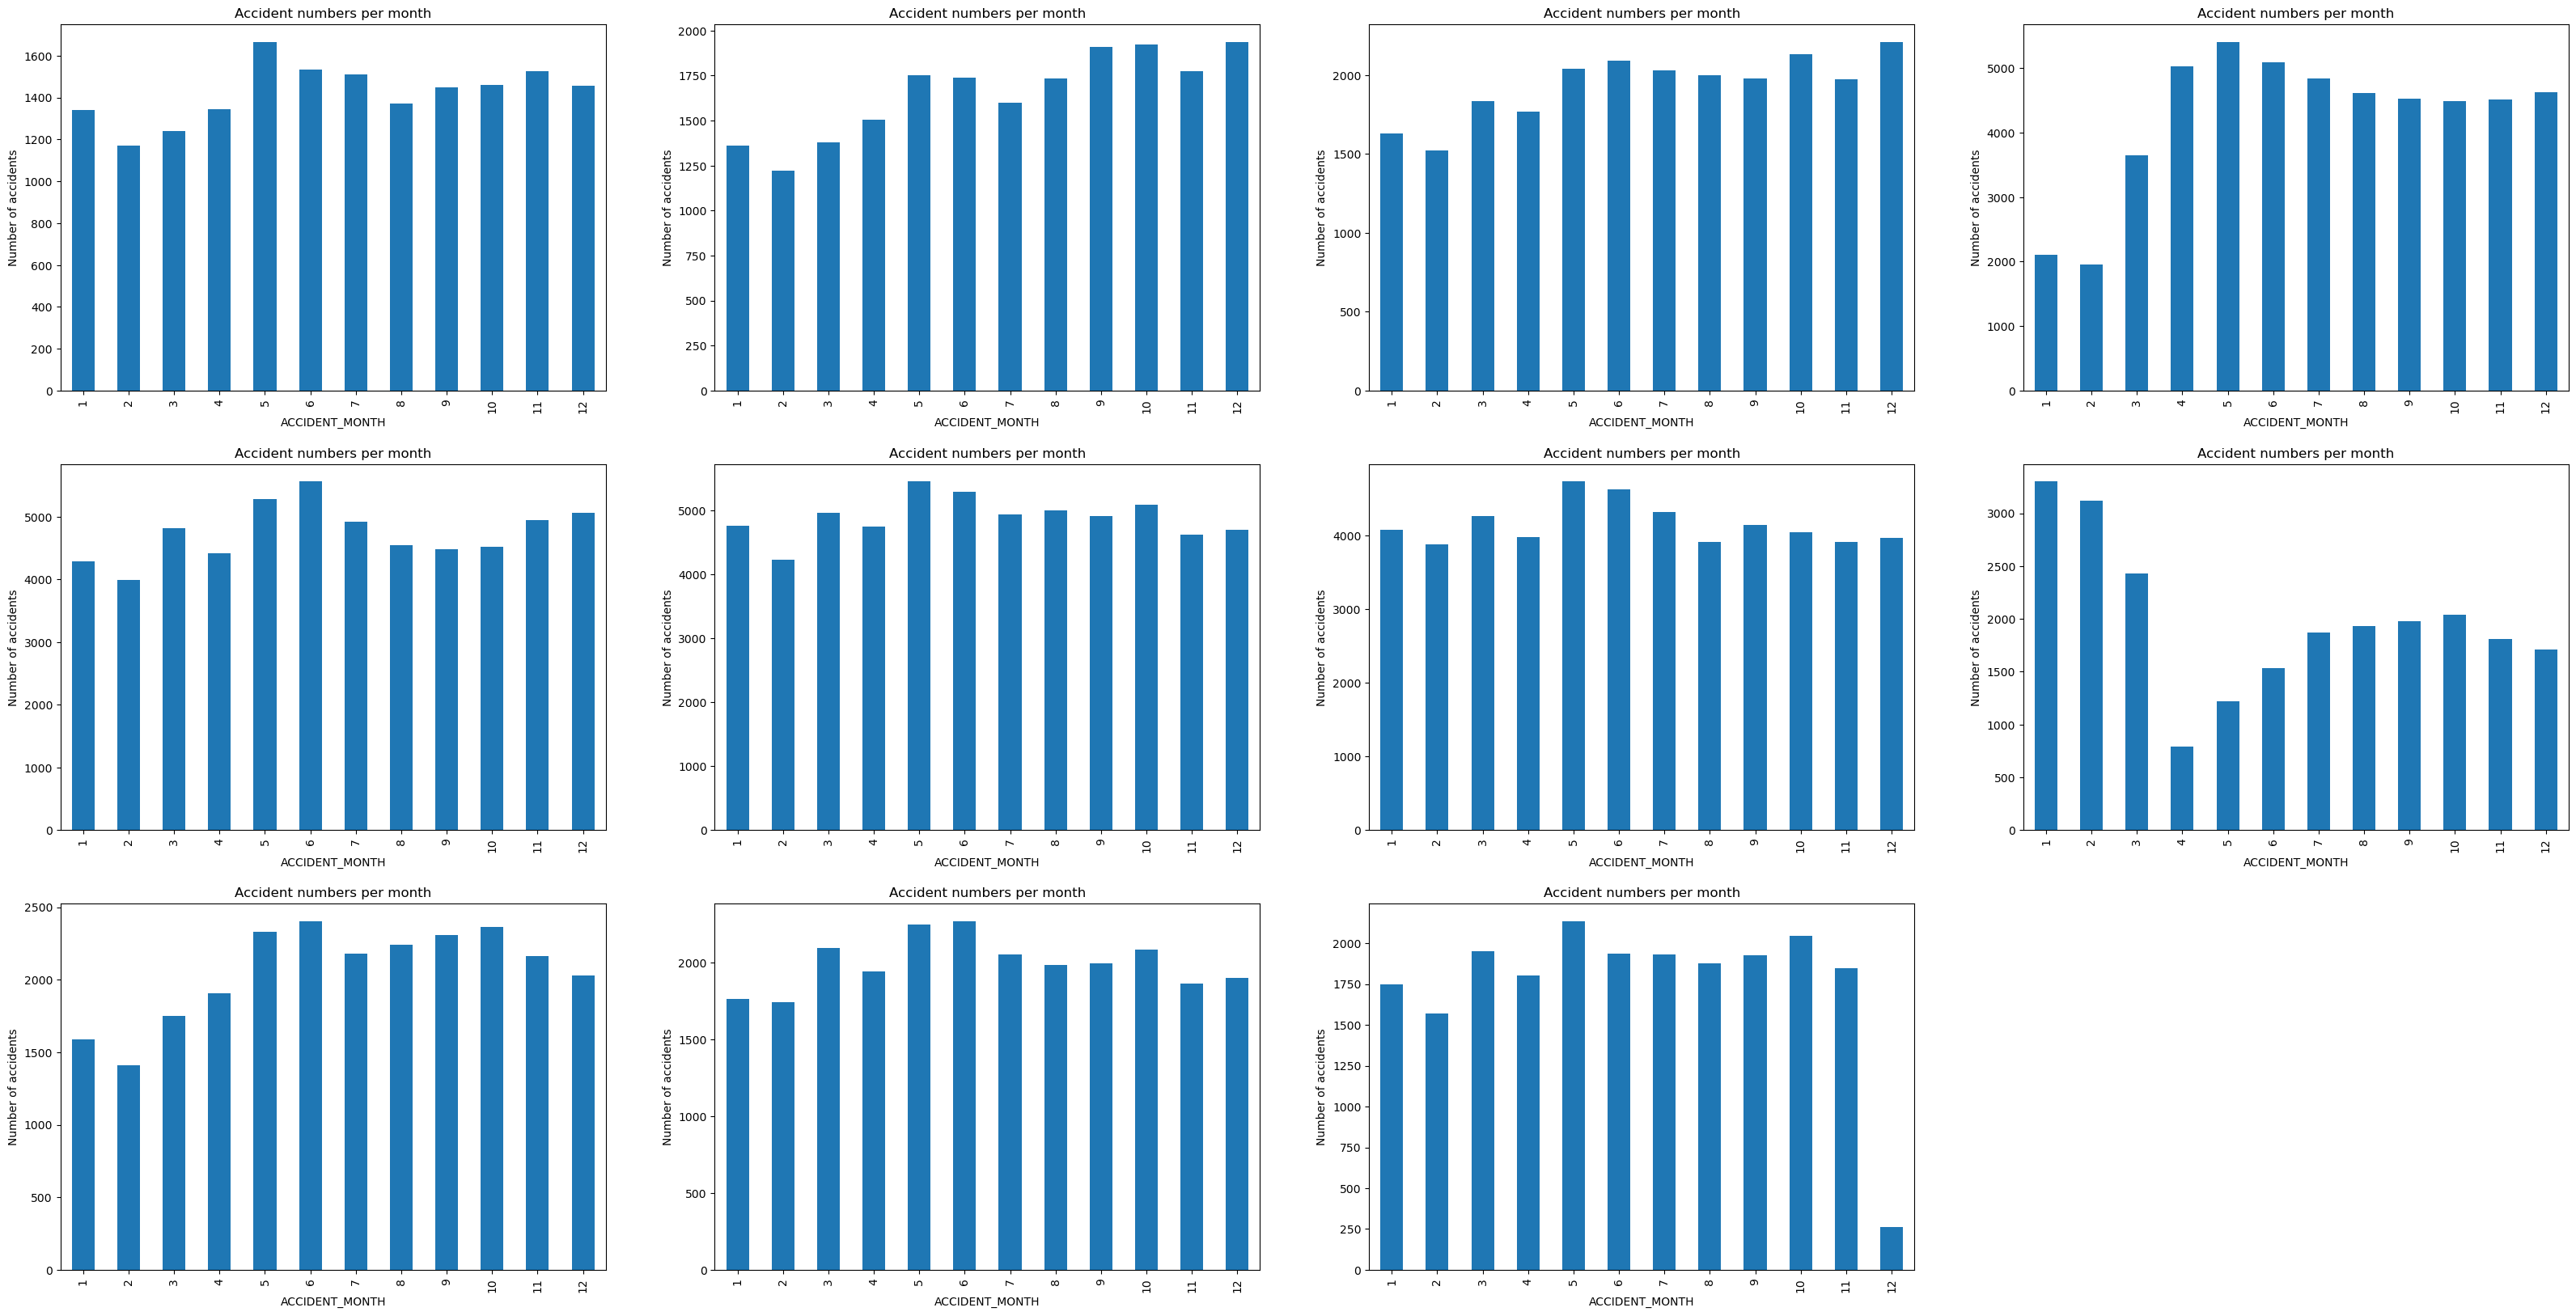

In [7]:
for cause in groupingDictionary_common.keys():
    datasets_temp = []

    for dataset in datasets:
        datasets_temp.append(dataset[dataset['MAJOR ACCIDENT TYPE 1'] == cause])
    
    getPlots(datasets_temp, cause)

Equipped with this knowledge of seasonal trends, we now begin the second iteration of the Visual Analytics workflow.

This iteration is mainly focused on supplementing our dataset with weather info (Data Mining), and then observing the relation between the various weather factors and the accident numbers. This has been carried out in the other notebooks in this folder.


For all of these analysis, we leave out the years 2020-23, as the data is not well suited for observing trends due to the Covid 19 lockdown.